# Load the Dataset

In [2]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('denverdata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

Date
2005-01-01    391
2005-01-02    392
2005-01-03    394
2005-01-04    396
2005-01-05    398
Name: ETR, dtype: int64


<Figure size 640x480 with 1 Axes>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [4]:
%matplotlib inline

In [5]:
df = read_csv('denverdata.csv')

In [6]:
df.head()

,Date,ETR
0,2005-01-01,391
1,2005-01-02,392
2,2005-01-03,394
3,2005-01-04,396
4,2005-01-05,398


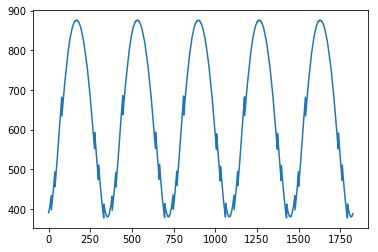

In [7]:
plt.plot(df['ETR'])

# Dickey-Fuller Stationarity Test

In [8]:
X = df['ETR'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0] < result[4]['5%']:
    print ("Reject Ho Null Hypothesis is Stationary")
else:
    print("Failed to reject Ho - Time Series is Non Stationary")


ADF Statistic: -6.373224
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho Null Hypothesis is Stationary


# ARIMA (1,0,1) Test

Test RMSE: 6.182
Test MAE: 3.660


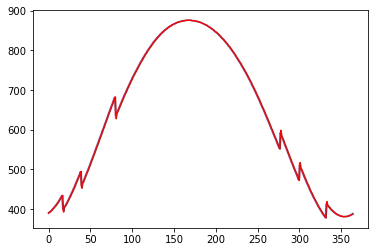

In [9]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('denverdata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [10]:
# fit model
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(1, 1)   Log Likelihood               -4742.315
Method:                       css-mle   S.D. of innovations              6.201
Date:                Fri, 19 Jun 2020   AIC                           9492.630
Time:                        22:19:08   BIC                           9513.777
Sample:                             0   HQIC                          9500.518
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        478.7097    153.993      3.109      0.002     176.890     780.530
ar.L1.y        0.9992      0.001   1472.276      0.000       0.998       1.001
ma.L1.y        0.1524      0.023      6.694      0.0

# ARIMA (1,0,0) Test

Test RMSE: 6.283
Test MAE: 3.992


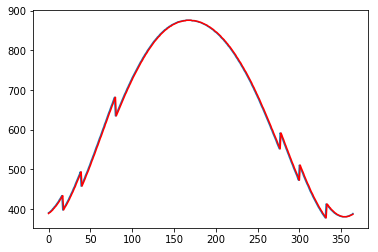

In [9]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('denverdata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [11]:
# fit model
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(1, 0)   Log Likelihood               -4764.547
Method:                       css-mle   S.D. of innovations              6.296
Date:                Fri, 19 Jun 2020   AIC                           9535.095
Time:                        22:19:16   BIC                           9550.955
Sample:                             0   HQIC                          9541.011
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.7711    154.445      3.029      0.002     165.065     770.477
ar.L1.y        0.9994      0.001   1762.963      0.000       0.998       1.000
                                    Roots           

# ARIMA (0,0,1) Test

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('denverdata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 89.125
Test MAE: 79.850


<Figure size 640x480 with 1 Axes>

In [12]:
# fit model
model = ARIMA(train, order=(0,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(0, 1)   Log Likelihood               -8640.665
Method:                       css-mle   S.D. of innovations             89.490
Date:                Fri, 19 Jun 2020   AIC                          17287.330
Time:                        22:19:38   BIC                          17303.190
Sample:                             0   HQIC                         17293.246
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        636.1242      4.640    137.089      0.000     627.029     645.219
ma.L1.y        0.9826      0.004    268.172      0.000       0.975       0.990
                                    Roots           

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from time import time
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('chicagodata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# solvers
solvers = ['lbfgs', 'bfgs', 'newton', 'nm', 'cg', 'ncg', 'powell']
scores = []
times = []
for solver in solvers:
    start_time = time()
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        # fit model
        model = ARIMA(history, order=(1,0,1))
        model_fit = model.fit(disp=False, solver=solver)
        # one step forecast
        yhat = model_fit.forecast()[0]
        # store forecast and ob
        predictions.append(yhat)
        history.append(test[t])
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    timing = time() - start_time
    scores.append(rmse)
    times.append(timing)
    print('Solver=%s, Test RMSE: %.3f, Test MAE: %.3f, Time=%f' % (solver, rmse, mae, timing))
# plot scores
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, scores)
pyplot.xticks(ticks, solvers)
pyplot.show()
# plot times
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, times)
pyplot.xticks(ticks, solvers)
pyplot.show()

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


            ETR
Date           
2005-01-01  391
2005-01-02  392
2005-01-03  394
2005-01-04  396
2005-01-05  398
2005-01-06  401
2005-01-07  403
2005-01-08  405
2005-01-09  408
2005-01-10  411
2005-01-11  414
2005-01-12  417
2005-01-13  420
2005-01-14  423
2005-01-15  427
2005-01-16  431
2005-01-17  434
2005-01-18  398
2005-01-19  402
2005-01-20  405


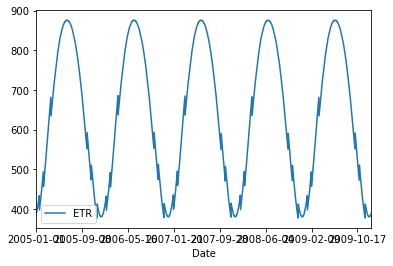

In [11]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('denverdata.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [12]:
# split the dataset
from pandas import read_csv
series = read_csv('denverdata.csv', header=0, index_col=0)
split_point = len(series) - 365
dataset, validation = series[0:split_point], series[split_point:]
print('Denver Train %d, Denver Test %d' % (len(dataset), len(validation)))
dataset.to_csv('denvertrain.csv', index=False)
validation.to_csv('denvertest.csv', index=False)

Denver Train 1461, Denver Test 365


# One-Step Out of Sample Forecast - ARIMA (1,0,1)

In [14]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [15]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# fit model
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
print('Forecast: %f' % forecast)

Forecast: 389.344417


### Take-Aways
* This is the forecast for the first day in the test data set.
* The real value for this day, January 1st 2009, is 391.
* The model is very accurate with its predicted ETR value of 389.

# One-Step Out of Sample Forecast - ARIMA (1,0,0)

In [16]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [17]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# fit model
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
print('Forecast: %f' % forecast)

Forecast: 389.049585


### Take-Aways
* Although the forecast is still close to the real value, ARIMA (1,0,1) did a fractionally better job of predicting the value.